# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 50)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])
df = df.sort_values('amount')

In [4]:
df

,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action
27,eosio.vpay,2022-10-29 05:00:02,2022-10-29 05:00:02,123.0817,EOS,eosio.vpay,eosvenezuela,275685676,c2b51e403504e278d5584e9d71bef620ab8e43db972f5b...,producer vote pay,eosio.token,transfer
22,eosio.vpay,2022-10-28 04:00:02,2022-10-28 04:00:02,125.0712,EOS,eosio.vpay,eosvenezuela,275505734,706a1eeb441f1d3753666564edbb010defafb3738ed31c...,producer vote pay,eosio.token,transfer
59,eosio.vpay,2022-10-28 14:55:30,2022-10-28 14:55:30,125.9188,EOS,eosio.vpay,certikeosorg,275584366,226f74f0665185296ed3d1ca5681e635f1aace881d4c8b...,producer vote pay,eosio.token,transfer
59,eosio.vpay,2022-10-29 15:06:42,2022-10-29 15:06:42,126.2208,EOS,eosio.vpay,certikeosorg,275758443,905c43b9f305479e7639223d5b6cc3746882d2ff47939a...,producer vote pay,eosio.token,transfer
78,eosio.vpay,2022-10-21 22:00:02,2022-10-21 22:00:02,127.0384,EOS,eosio.vpay,eosvenezuela,274426331,d2c797d49f359cb8943aff2d3cb4d27828239c0f4683d2...,producer vote pay,eosio.token,transfer
...,...,...,...,...,...,...,...,...,...,...,...,...
1,eosio.vpay,2022-10-26 00:04:06,2022-10-26 00:04:06,710.1293,EOS,eosio.vpay,newdex.bp,275132030,c1392afa838ce149f57f61689f744545fb0dea4013afc7...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-10-25 00:03:57,2022-10-25 00:03:57,710.8208,EOS,eosio.vpay,newdex.bp,274959322,e2725b2fe52c788109554b1a321f235df168d7eb8bb9e1...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-10-28 00:04:19,2022-10-28 00:04:19,711.8257,EOS,eosio.vpay,newdex.bp,275477459,b096ed5a27faf51d93fb5c3a8984fcfff520da2924f979...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-10-29 00:04:36,2022-10-29 00:04:36,712.7486,EOS,eosio.vpay,newdex.bp,275650228,e03fd7db2f2ce23e6130d0afc5c3ee4d31ea6ae7e8c4de...,producer vote pay,eosio.token,transfer


In [5]:
from pysankey import sankey
import seaborn as sns

In [6]:
left_colors = {'eosio.bpay': '#3d3d3d', 'eosio.vpay': '#9a9a9a'}
right_colors = {}
palette = (c for c in sns.color_palette('husl', df['to'].nunique()))

for dest in df['to'].unique():
    right_colors[dest] = next(palette)

 The following arguments are deprecated and should be removed: figSize in sankey()


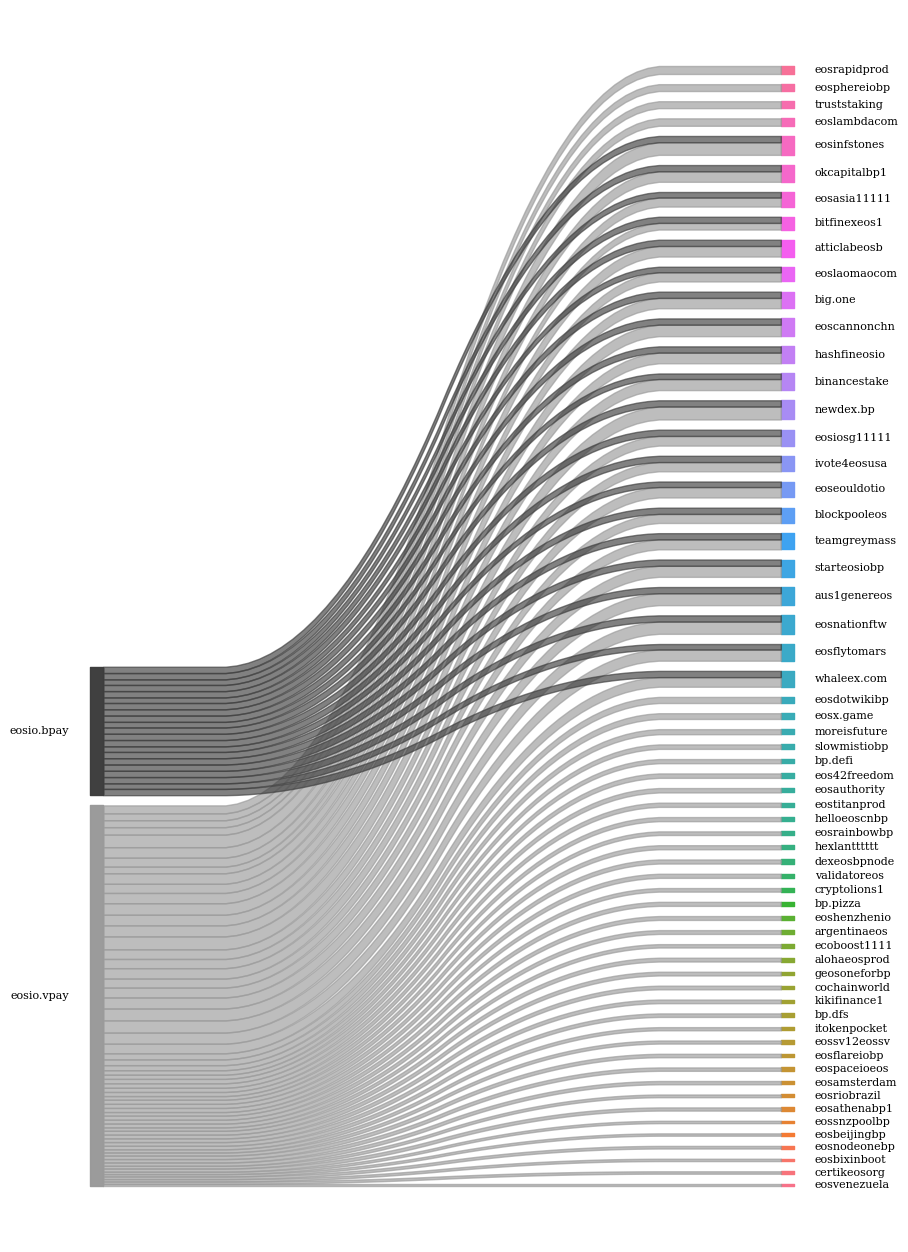

In [7]:
weight = df['amount'].astype(float)
ax = sankey(
    left=df['from'],
    right=df['to'],
    rightWeight=weight,
    leftWeight=weight,
    aspect=2,
    fontsize=8,
    figSize=(10, 16),
    colorDict=left_colors | right_colors
)